<h1 style="color: #AA1358;">EDA</h1>

<h2 style="color: #A4064D;">Libraries</h2>

In [1]:
## Basic libraries
import pandas as pd # data manipulation
import numpy as np # funciones matemáticas

## EDA Libraries
!pip install wordcloud
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

## Settings
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

<h2 style="color: #A4064D;">EDA Exploration</h2>

<h3 style="color: #6D183F;">Importing CSV</h3>

In [2]:
# First, we need to charge the df exported from Initial Set Up
# Let's take a sneak peak

data = pd.read_csv("for_eda.csv", index_col="Unnamed: 0")
df = data.copy()
df

id  age   education marital_status   income  childrenhome  \
0      5524   67  Graduation         Single  58138.0             0   
1      2174   70  Graduation         Single  46344.0             2   
2      4141   59  Graduation       Together  71613.0             0   
3      6182   40  Graduation       Together  26646.0             1   
4      5324   43         PhD        Married  58293.0             1   
...     ...  ...         ...            ...      ...           ...   
2235  10870   57  Graduation        Married  61223.0             1   
2236   4001   78         PhD       Together  64014.0             3   
2237   7270   43  Graduation       Divorced  56981.0             0   
2238   8235   68      Master       Together  69245.0             1   
2239   9405   70         PhD        Married  52869.0             2   

     dt_customer  recency  wine_products  fruit_products  meat_products  \
0     2012-09-04       58            635              88            546   
1     2014-03-08       38             11               1              6   
2     2013-08-21       26            426              49            127   
3     2014-02-10       26             11               4             20   
4     2014-01-19       94            173              43            118   
...          ...      ...            ...             ...            ...   
2235  2013-06-13       46            709              43            182   
2236  2014-06-10       56            406               0             30   
2237  2014-01-25       91            908              48            217   
2238  2014-01-24        8            428              30            214   
2239  2012-10-15       40             84               3             61   

      fish_products  sweet_products  gold_products  total_products  \
0               172              88             88            1617   
1                 2               1              6              27   
2               111              21             42             776   
3                10               3              5              53   
4                46              27             15             422   
...             ...             ...            ...             ...   
2235             42             118            247            1341   
2236              0               0              8             444   
2237             32              12             24            1241   
2238             80              30             61             843   
2239              2               1             21             172   

      deal_purchases  web_purchases  catalog_purchases  store_purchases  \
0                  3              8                 10                4   
1                  2              1                  1                2   
2                  1              8                  2               10   
3                  2              2                  0                4   
4                  5              5                  3                6   
...              ...            ...                ...              ...   
2235               2              9                  3                4   
2236               7              8                  2                5   
2237               1              2                  3               13   
2238               2              6                  5               10   
2239               3              3                  1                4   

      total_purchases  web_visits_permonth  acceptedcmp3  acceptedcmp4  \
0                  22                    7             0             0   
1                   4                    5             0             0   
2                  20                    4             0             0   
3                   6                    6             0             0   
4                  14                    5             0             0   
...               ...                  ...           ...           ...   
2235   

<h3 style="color: #6D183F;">Treating "age" | Making "age" Clusters</h3>

<Axes: xlabel='age', ylabel='Count'>

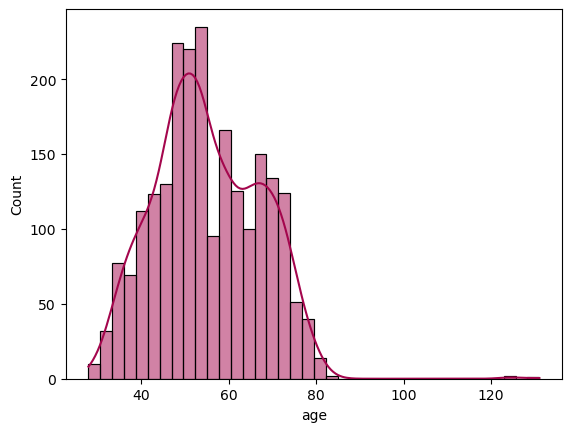

In [3]:
# Let's explore about the clients ages

sns.histplot(data=df, x=df["age"], kde=True, color="#A4064D")

In [4]:
# We see some dispersed rare-outliners at skew right (must been errors), lets remove them

age_outliers = df[df["age"]>120]
df.drop(index=age_outliers.index, axis=1, inplace=True)

In [5]:
# Now, we group up ages into clusters to have a better reference for further comparisons

df["age"].describe()

count    2233.000000
mean       55.107479
std        11.697927
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max        84.000000
Name: age, dtype: float64

In [6]:
# We labeled the groups based on the age classification obtained by describe()

age_group = []

for age in df["age"]:
    if age <= 47:
        age_group.append("Adult")
    elif age <= 65:
        age_group.append("Middle-Age")
    else:
        age_group.append("Senior")

In [7]:
df.insert(loc=2, column="age_group", value=age_group)

<Axes: xlabel='age_group', ylabel='count'>

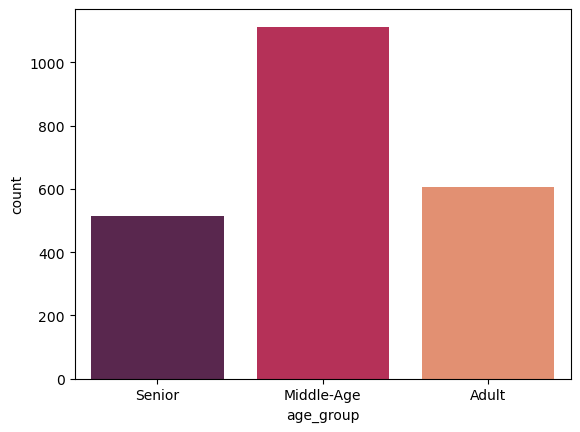

In [8]:
# Let's check how the groups were 

sns.countplot(data=df, x=df["age_group"], palette="rocket")

- It is easy to see that the **Middle-Age group** is the **most common** in our population

<h2 style="color: #A4064D;">CLIENTS STATISTICS</h2>

<h3 style="color: #6D183F;">Sneak Peak: Income vs Total Variables Clusters</h3>

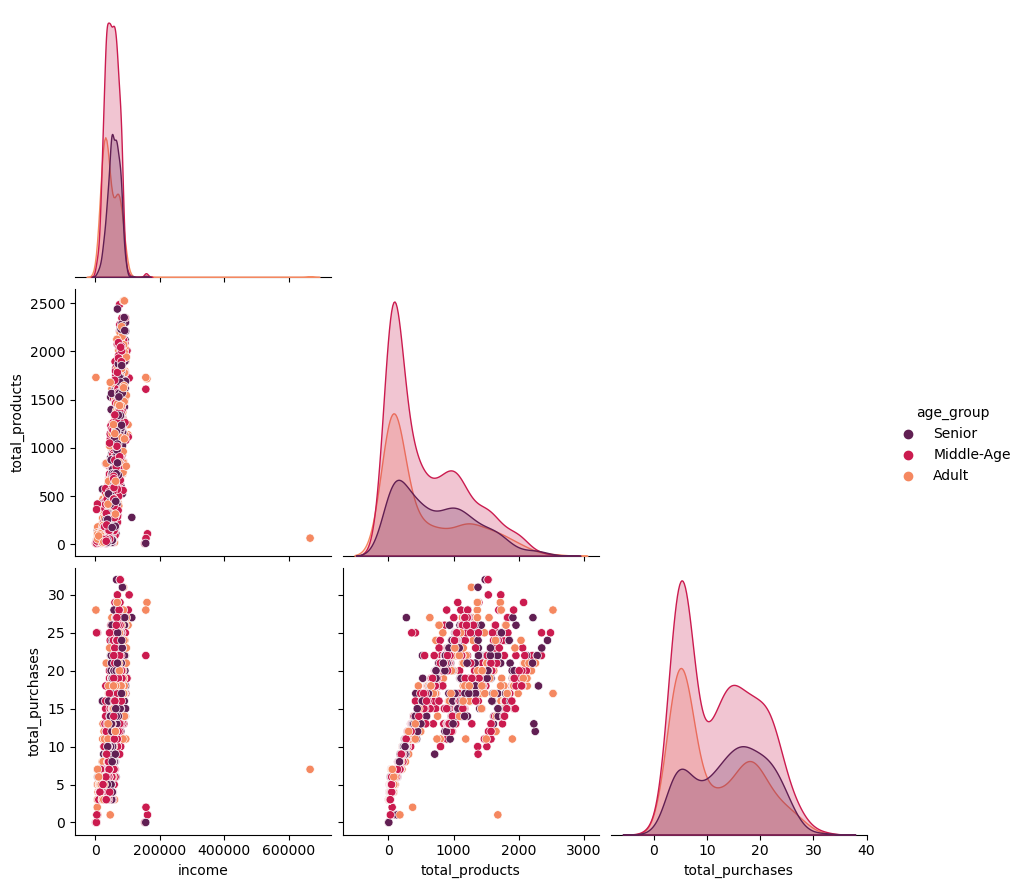

In [9]:
# Let's use pairplots to check out relations between clients "income" and "total_products" (amount spent) and "total_purchases"
# We using age clusters to get more information about the plots

sns.pairplot(df , vars=["income", "total_products", "total_purchases"] , hue="age_group", palette="rocket", height=3, corner=True)

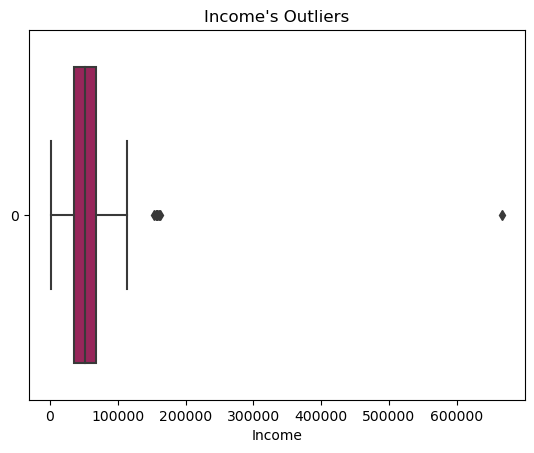

In [10]:
# There are some annoying outliers at "income", so lets clean them up

sns.boxplot(data=df["income"], orient='h', color="#AA1358")
plt.title("Income's Outliers", fontsize=12)
plt.xlabel("Income", fontsize=10)
plt.show()

In [11]:
income_outliers = df[df["income"]>140000]
df.drop(index=income_outliers.index, axis=1, inplace=True)

In [12]:
purchases_outliers = df[df["total_purchases"]>1250]
df.drop(index=purchases_outliers.index, axis=1, inplace=True)

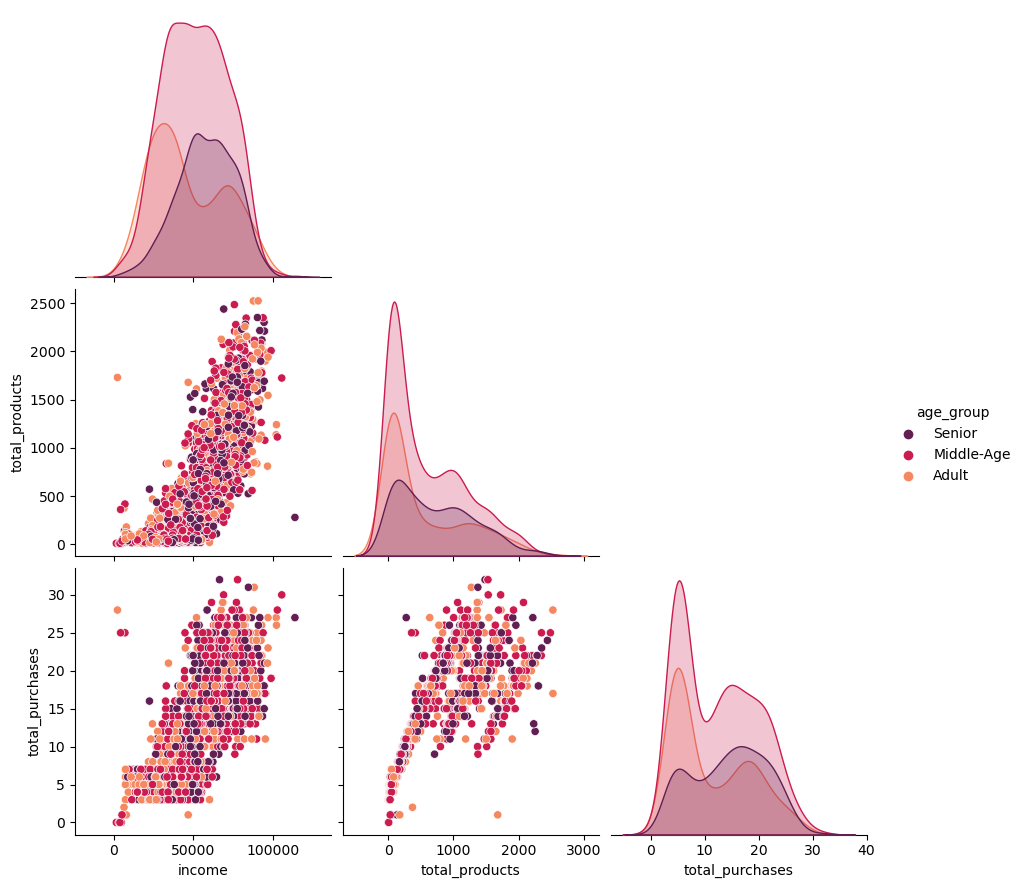

In [13]:
# After cleaning the most rare outliers, we can better apreciate the relation income/amount_spent/purchases

sns.pairplot(df , vars=["income", "total_products", "total_purchases"] , hue="age_group", palette="rocket", height=3, corner=True)

- In all **Income** ranges, the **Middle-Age** sector predominates. Followed in the first half by the **Adult** group and in the second half by the **Senior** group
- For **Amount Spent**, **Middle-Age** again dominates, followed by the **Adult** and **Senior** groups. During the increase in spending, we noted a drop in the **Adult** group and an increase in the **Senior** group
- For **Total Purchases**, the evolution is quite similar to that observed for other variables. **Middle-Age** predominates, followed by **Adult** and **Senior**. As in Expenditure, **Senior** overpowers **Adult** as the number of purchases increases

<h3 style="color: #6D183F;">Income & Amount Spent Histograms</h3>

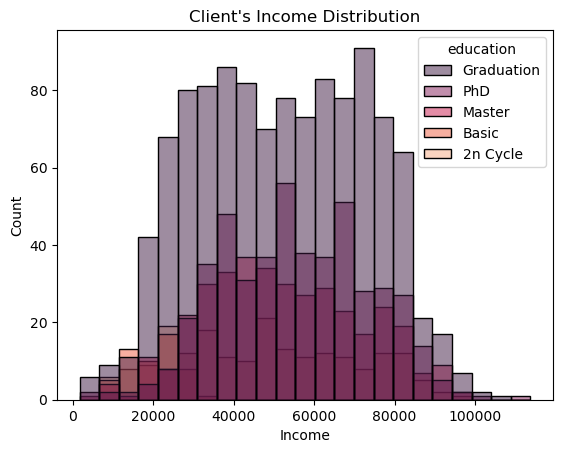

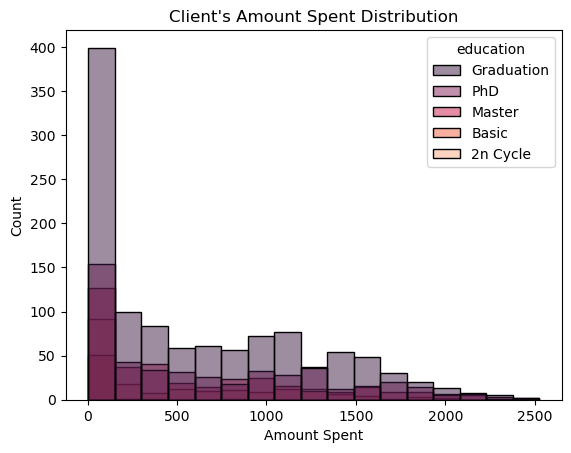

In [14]:
# Let's take a look to "income" and "total_products" distribution
# We will bring the "education"'s hue to add more flavor to both histograms

sns.histplot(x=df["income"], hue=df["education"], palette="rocket" )
plt.xlabel("Income")
plt.ylabel("Count")
plt.title("Client's Income Distribution")
plt.show()

sns.histplot(x=df["total_products"], hue=df["education"], palette="rocket" )
plt.xlabel("Amount Spent")
plt.ylabel("Count")
plt.title("Client's Amount Spent Distribution")
plt.show()

- For the distribution of **Income** grouped by **Level of Education**, we can see that **Graduation** dominates all ranges. We can understand that the **purchasing power** is correlated with the **grade of education** (the **Post-Graduation** groups are below, being less frequent)
- In the distribution of Amount Spent, we see that the **Graduation** level also predominates. From the right-skewed distribution we understand that the **highest amount spent** is in the **first ranges**, diluting towards higher amounts spent

<h3 style="color: #6D183F;">Amount spent vs Income</h3>

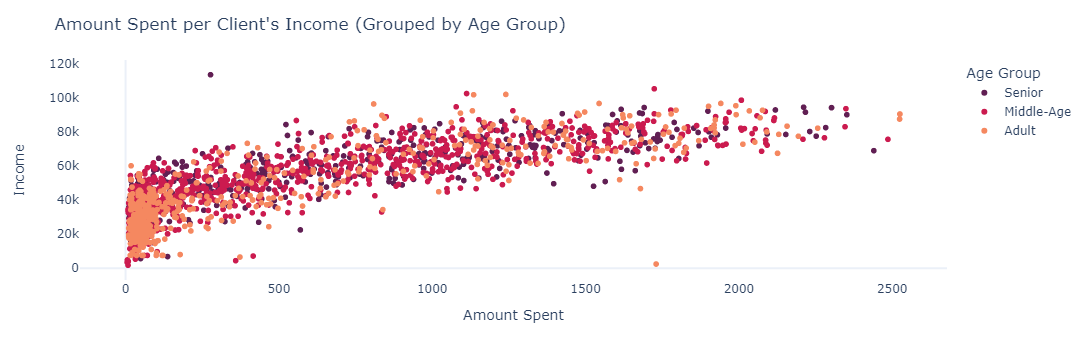

In [15]:
# Let's take a closer look to "income"/"total_products" scatter plot
# We will use "age group" as a hue
# Let's make a px.scatter to have an interactive reference 

colors_age = {"Senior": "#611f53", "Middle-Age": "#cb1b4f", "Adult": "#f58860"}

fig = px.scatter(df, x="total_products", y="income", color="age_group", color_discrete_map=colors_age)
fig.update_layout(
    template="plotly_white",
    title="Amount Spent per Client's Income (Grouped by Age Group)",
    xaxis=dict(title="Amount Spent"), 
    yaxis=dict(title="Income"),           
    legend=dict(title="Age Group"),       
    showlegend=True,                      
    xaxis_showgrid=False,                 
    yaxis_showgrid=False)

- In this plot, we can see how the mass of **Adults** is agglomerated in the first ranks and **Middle-Age** is gaining relevance in a linear ascent

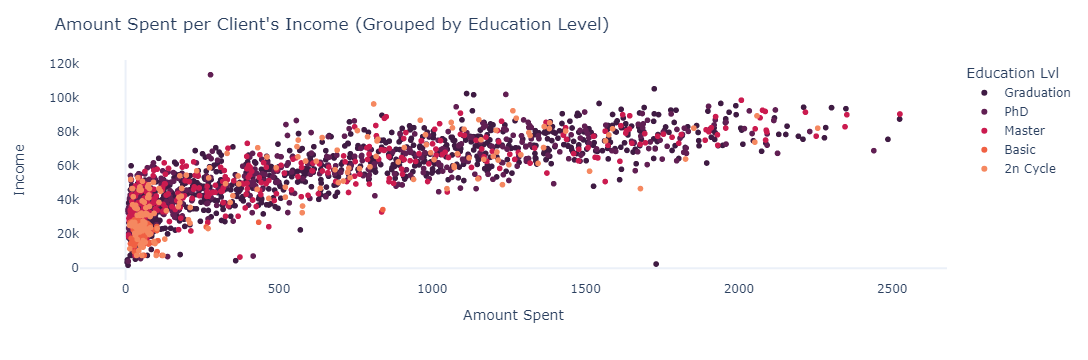

In [16]:
# Now we get a second plot nuanced by "education"

colors_edu = {"Graduation": "#3f1b43", "PhD": "#611f53", "Master": "#cb1b4f", "Basic":"#f06043", "2n Cycle":"#f58860"}

fig = px.scatter(df, x="total_products", y="income", color="education", color_discrete_map=colors_edu)
fig.update_layout(
    template="plotly_white",
    title="Amount Spent per Client's Income (Grouped by Education Level)",
    xaxis=dict(title="Amount Spent"), 
    yaxis=dict(title="Income"),           
    legend=dict(title="Education Lvl"),       
    showlegend=True,                      
    xaxis_showgrid=False,                 
    yaxis_showgrid=False)

- In the same plot but grouped by **Education**, we see that the lowest levels of education are grouped in the first ranks. The progression is linear and the higher levels of **Education** predominate

<h3 style="color: #6D183F;">Purchases vs Income</h3>

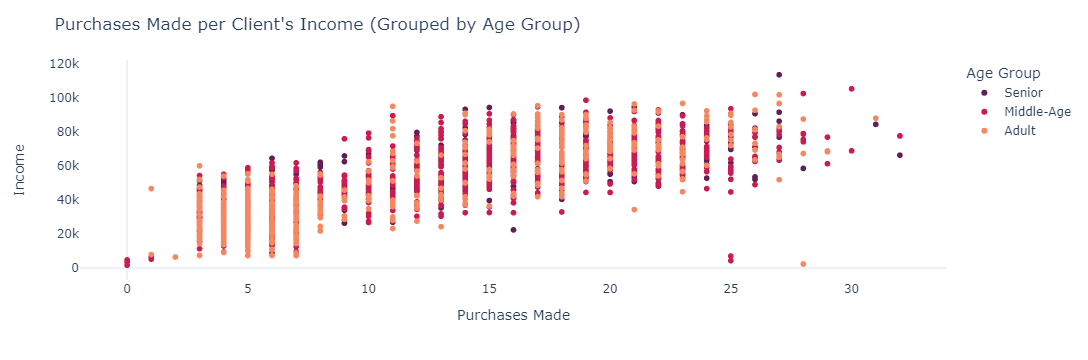

In [17]:
# Now a closer look to "income"/"total_purchases" scatter plot
# We will use "age group" as a hue
# Let's make a px.scatter to have an interactive reference 

colors_age = {"Senior": "#611f53", "Middle-Age": "#cb1b4f", "Adult": "#f58860"}

fig = px.scatter(df, x="total_purchases", y="income", color="age_group", color_discrete_map=colors_age)
fig.update_layout(
    template="plotly_white",
    title="Purchases Made per Client's Income (Grouped by Age Group)",
    xaxis=dict(title="Purchases Made"), 
    yaxis=dict(title="Income"),           
    legend=dict(title="Age Group"),       
    showlegend=True,                      
    xaxis_showgrid=False,                 
    yaxis_showgrid=False)

- Once again, we can see an upward trend. **Adults** in the lower levels giving way to **Middle-Age**

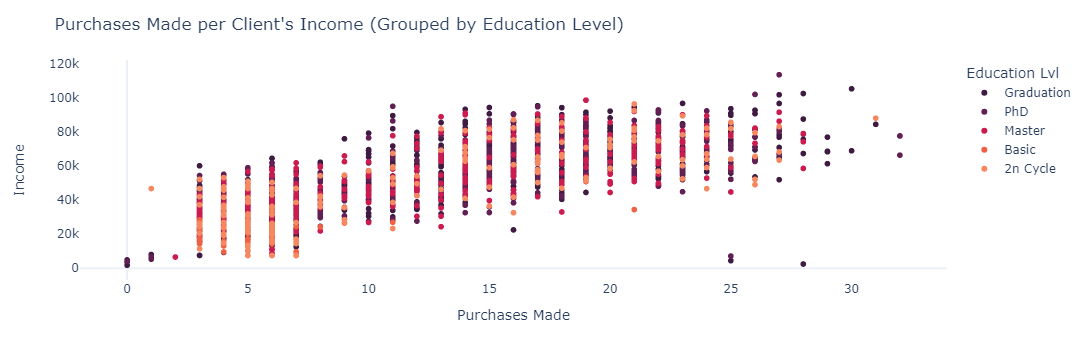

In [18]:
# Now we get a second plot nuanced by "education"

colors_edu = {"Graduation": "#3f1b43", "PhD": "#611f53", "Master": "#cb1b4f", "Basic":"#f06043", "2n Cycle":"#f58860"}

fig = px.scatter(df, x="total_purchases", y="income", color="education", color_discrete_map=colors_edu)
fig.update_layout(
    template="plotly_white",
    title="Purchases Made per Client's Income (Grouped by Education Level)",
    xaxis=dict(title="Purchases Made"), 
    yaxis=dict(title="Income"),           
    legend=dict(title="Education Lvl"),       
    showlegend=True,                      
    xaxis_showgrid=False,                 
    yaxis_showgrid=False)

- For the grouping by **Education**, patterns similar to the previous graphs occur. The most basic levels in the first ranks and the highest levels gain prominence in the largest number of purchases

<h2 style="color: #A4064D;">SPECIFIC STATISTICS</h2>

<h3 style="color: #6D183F;">Group Age / Education</h3>

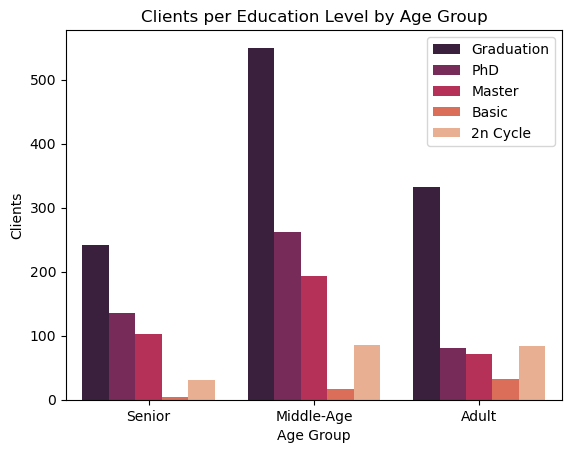

In [19]:
# Let's find out which customer is the most frequent by "education" and "age_group" 

sns.countplot(data=df, x="age_group", hue="education", palette="rocket")
plt.xlabel("Age Group")
plt.ylabel("Clients")
plt.title("Clients per Education Level by Age Group")
plt.legend()
plt.show()

- The correlation observed in the previous plots is confirmed here. Both age (**Middle-Age**) and education (**Graduation**) predominate as frequent customers

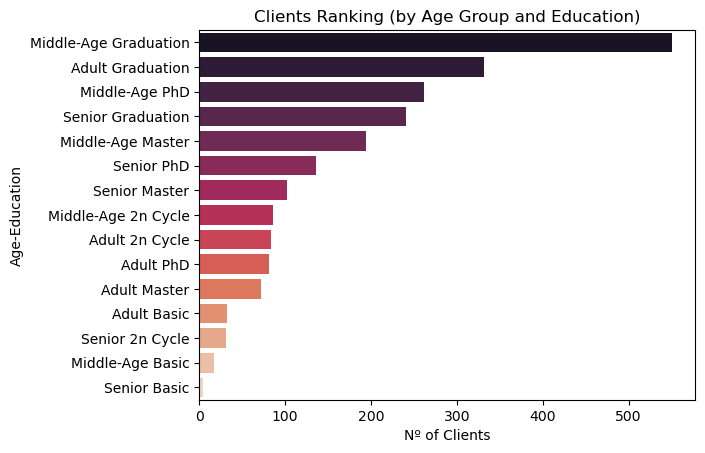

In [20]:
# Now let's get a better insight in detail
# After "age_group" and "education" tags concatenation we will see a new clients ranking

age_edu = df["age_group"] + " " + df["education"]
age_edu = age_edu.value_counts().reset_index()


sns.barplot(data=age_edu, x=age_edu["count"], y=age_edu["index"], palette="rocket")
plt.xlabel("Nº of Clients")
plt.ylabel("Age-Education")
plt.title("Clients Ranking (by Age Group and Education)")
plt.show()

In [21]:
# We make a function to print the top 5 insights

def top_5_insights(dataframe, dataframe2):
    dataframe = dataframe.head(5)
    total_clients = len(dataframe2)
    
    for index, row in dataframe.iterrows():
        word = row["index"]
        count = row["count"]
        percentage = round(count / total_clients * 100, 2)
        print(f"{word}: {count} clients of {total_clients}; {percentage}% of total clients")

In [22]:
top_5_insights(age_edu, df)

Middle-Age Graduation: 550 clients of 2225; 24.72% of total clients
Adult Graduation: 332 clients of 2225; 14.92% of total clients
Middle-Age PhD: 262 clients of 2225; 11.78% of total clients
Senior Graduation: 241 clients of 2225; 10.83% of total clients
Middle-Age Master: 194 clients of 2225; 8.72% of total clients


<h3 style="color: #6D183F;">Group Age / Marital Status</h3>

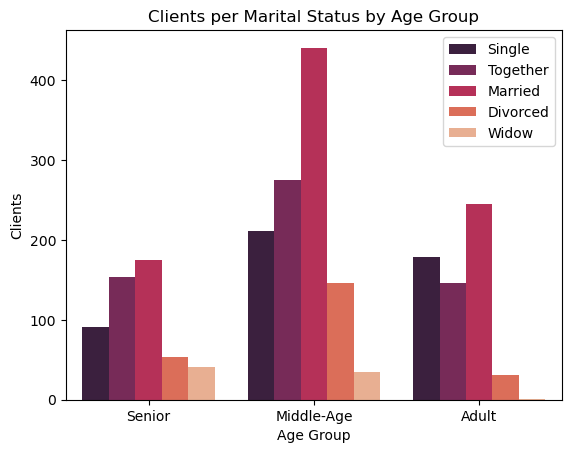

In [23]:
# Now, what is the most frequent type of client by "marital_status" and "age_group"?

sns.countplot(data=df, x="age_group", hue="marital_status", palette="rocket")
plt.xlabel("Age Group")
plt.ylabel("Clients")
plt.title("Clients per Marital Status by Age Group")
plt.legend()
plt.show()

- This plot indicates the predominance of the **Married** and **Together** groups among our clients. Except in the case of **Adults** cluster, where **Single** takes the lead behind **Married**

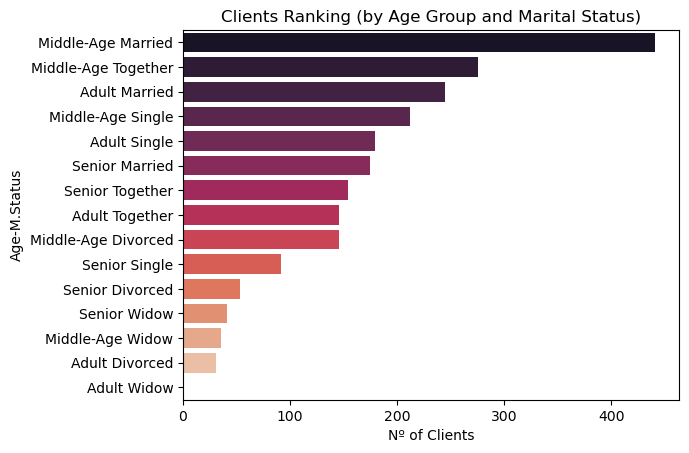

In [24]:
# As we did it before, let's rank our type of clients. This time by "marital_status" and "age_group"

age_mar = df["age_group"] + " " + df["marital_status"]
age_mar = age_mar.value_counts().reset_index()


sns.barplot(data=age_mar, x=age_mar["count"], y=age_mar["index"], palette="rocket")
plt.xlabel("Nº of Clients")
plt.ylabel("Age-M.Status")
plt.title("Clients Ranking (by Age Group and Marital Status)")
plt.show()

In [25]:
# We use the function we define in the previous classification

top_5_insights(age_mar, df)

Middle-Age Married: 441 clients of 2225; 19.82% of total clients
Middle-Age Together: 275 clients of 2225; 12.36% of total clients
Adult Married: 245 clients of 2225; 11.01% of total clients
Middle-Age Single: 212 clients of 2225; 9.53% of total clients
Adult Single: 179 clients of 2225; 8.04% of total clients


<h3 style="color: #6D183F;">Group Age / Education / Marital Status</h3>

In [26]:
# We saw a few patterns before between Age/M.Status and Age/Education
# How about considering three factors together?

age_mar_edu = df['age_group'] + " " + df['marital_status'] + " " + df["education"]
age_mar_edu = age_mar_edu.value_counts().reset_index()


In [27]:
top_age_mar_edu = age_mar_edu.head(5)

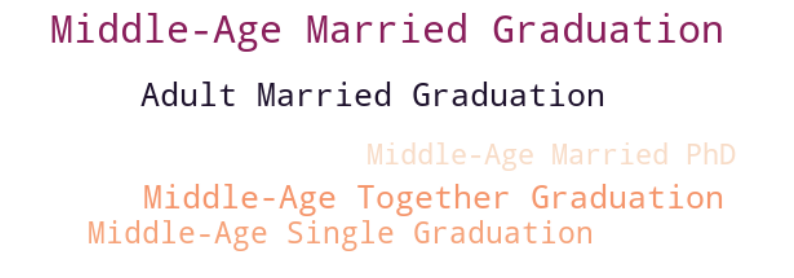

In [28]:
# We visualize a tag cloud to know which are our most frequent customers
# We will do it with the worldcloud library

age_mar_edu_dict = dict(zip(top_age_mar_edu["index"], top_age_mar_edu["count"]))

wordcloud = WordCloud(width=600, height=200, background_color="white", colormap="rocket").generate_from_frequencies(age_mar_edu_dict)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


- This tag cloud reveals the **top 5 types of customers**, among all the combinations of characteristics they can have

In [29]:
# Let's look at the percentage of total top customers of these highly segmented profiles

top_5_insights(age_mar_edu, df)

Middle-Age Married Graduation: 213 clients of 2225; 9.57% of total clients
Adult Married Graduation: 138 clients of 2225; 6.2% of total clients
Middle-Age Together Graduation: 135 clients of 2225; 6.07% of total clients
Middle-Age Single Graduation: 113 clients of 2225; 5.08% of total clients
Middle-Age Married PhD: 109 clients of 2225; 4.9% of total clients


<h3 style="color: #6D183F;">Best Selling Products</h3>

In [30]:
# Let's find out which type of product is the best seller
# To do this, we will segment the columns we are interested in and add up their totals 

products = df[["wine_products","fruit_products","meat_products","fish_products","sweet_products","gold_products"]]

In [31]:
amount_p = []
for col in products.columns:
    amount_p.append(products[col].sum())
amount_p

[678471, 58556, 367693, 83486, 60476, 97836]

In [32]:
products_list= ["Wine", "Fruit", "Meat", "Fish", "Sweet", "Gold"]

In [33]:
# We create a new df to sort values for a better visualization

products_per_amount = pd.DataFrame({"products": products_list,"amount_p":amount_p})
products_per_amount = products_per_amount.sort_values(by="amount_p", ascending=False)

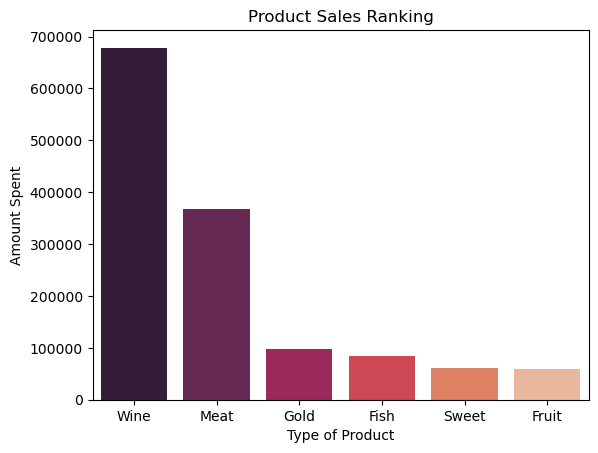

In [34]:
# Let's discover the best seller type

sns.barplot(data=products_per_amount, x="products", y="amount_p", palette="rocket")
plt.xlabel("Type of Product")
plt.ylabel("Amount Spent")
plt.title("Product Sales Ranking")
plt.show()

- The overwhelming difference between **Wine** and **Meat** with the other products, added to the usual profile of our customers, reveals the nature of our business: the sale of **gourmet items**

<h3 style="color: #6D183F;">Best Way to Purchase</h3>

In [35]:
# Now let's look for the most repeated form of purchase for our customers
# For that we will repeat the Best Selling Product's process

purchases = df[["web_purchases","catalog_purchases","store_purchases"]]

In [36]:
amount_pur = []

for col in purchases.columns:
    amount_pur.append(purchases[col].sum())
amount_pur

[9118, 5860, 12931]

In [37]:
purchases_list = ["Web", "Catalog", "Store"]

In [38]:
purchases_per_amount = pd.DataFrame({"purchases": purchases_list,"amount_pur":amount_pur})
purchases_per_amount = purchases_per_amount.sort_values(by="amount_pur", ascending=False)

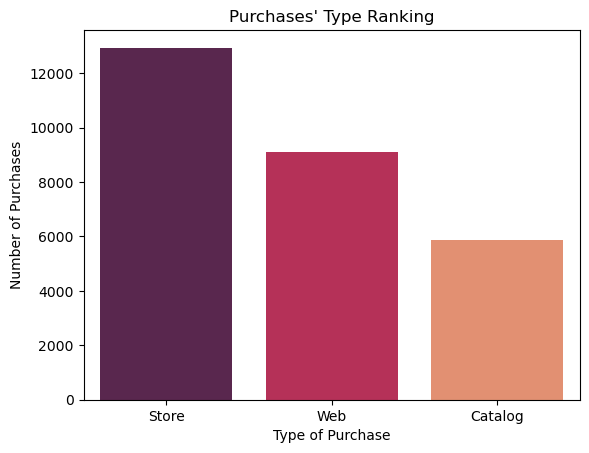

In [39]:
# What is the most repeated way of purchase by our customers?

sns.barplot(data=purchases_per_amount, x="purchases", y="amount_pur", palette="rocket")
plt.xlabel("Type of Purchase")
plt.ylabel("Number of Purchases")
plt.title("Purchases' Type Ranking")
plt.show()

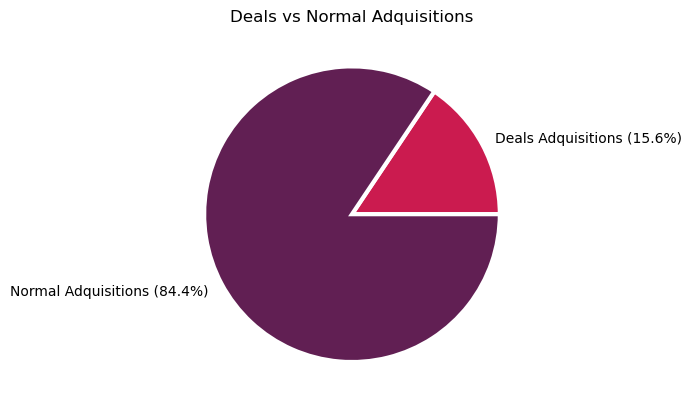

In [40]:
# And how about the percentage between deals adquisitions ("deal_purchases") and all purchases ("total_purchases")?

deals_per = [df["deal_purchases"].sum(),df["total_purchases"].sum()]
deals_names = "Deals Adquisitions (15.6%)", "Normal Adquisitions (84.4%)"
pie_colors = ["#cb1b4f","#611f53"]

plt.pie(deals_per, labels=deals_names, labeldistance=1.10, wedgeprops = {"linewidth":3, "edgecolor":"white"}, colors=pie_colors,)
plt.title("Deals vs Normal Adquisitions")
plt.show()

- **15.6%** of purchases through deals is a very good percentage. The fact that our offers are accepted is a good indication that we should **focus on offering more deals**

<h3 style="color: #6D183F;">Acceptance of Campaigns</h3> 

In [41]:
# From the 5 campaigns we already launched, let's see how them worked

campaigns = df[["acceptedcmp1","acceptedcmp2","acceptedcmp3","acceptedcmp4","acceptedcmp5"]]

In [42]:
campaigns_sum = []

for col in campaigns.columns:
    campaigns_sum.append(campaigns[col].sum())
campaigns_sum

[143, 30, 163, 167, 161]

In [43]:
campaigns_list = ["Campaign 1", "Campaign 2", "Campaign 3", "Campaign 4", "Campaign 5"]

In [44]:
campaigns_accep = pd.DataFrame({"campaigns":campaigns_list, "acceptance":campaigns_sum})
campaigns_accep = campaigns_accep.sort_values(by="acceptance", ascending=False)

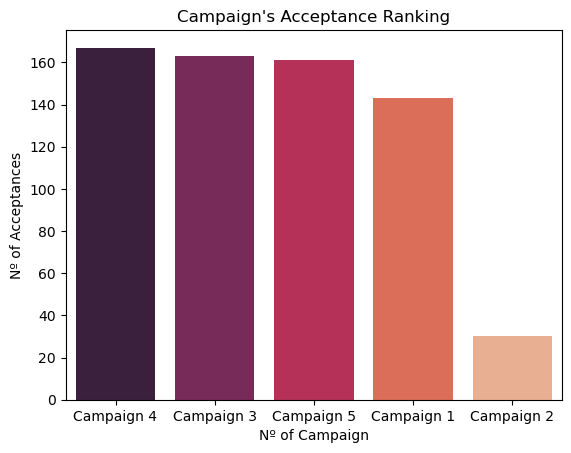

In [45]:
# What is the campaign that has worked best and what has been its acceptance rate?

sns.barplot(data=campaigns_accep, x="campaigns", y="acceptance", palette="rocket")
plt.xlabel("Nº of Campaign")
plt.ylabel("Nº of Acceptances")
plt.title("Campaign's Acceptance Ranking")
plt.show()

In [46]:
# What is the conversion rate for each campaign?

for index, row in campaigns_accep.iterrows():
        total_camp = len(df)
        camp = row["campaigns"]
        accept = row["acceptance"]
        percentage = round(accept / total_camp * 100, 2)
        print(f"{camp}: {accept} clients of {total_camp}; {percentage}% of total clients")

Campaign 4: 167 clients of 2225; 7.51% of total clients
Campaign 3: 163 clients of 2225; 7.33% of total clients
Campaign 5: 161 clients of 2225; 7.24% of total clients
Campaign 1: 143 clients of 2225; 6.43% of total clients
Campaign 2: 30 clients of 2225; 1.35% of total clients


- **Campaign 4** had the **highest acceptance**, followed closely by 3, 5 and 1
- **Campaign 2** had the **least impact** among subscribers
- Actually, these **conversion rates are quite low**. With **7.51%** as the maximum acceptance rate, we should propose to Marketing run **better segmented campaigns** to increase these metrics

<h2 style="color: #A4064D;">AUDIENCE SEGMENTATION</h2>

<h3 style="color: #6D183F;">Customer Ratings</h3>

In [47]:
# For Marketing purpouses, let's give to our clients a new label depending on "total_products"

In [48]:
df["total_products"].describe()

count    2225.000000
mean      605.176629
std       601.289750
min         5.000000
25%        69.000000
50%       396.000000
75%      1043.000000
max      2525.000000
Name: total_products, dtype: float64

In [49]:
#We will create a new column named "buyer_type" to assign grades to clients on their amount spent activity

buyer_type = []

for index, row in df.iterrows():
    if row["total_products"] >= 1043:
        buyer_type.append("VIP") 
    elif row["total_products"] >= 396:
        buyer_type.append("Good")
    elif row["total_products"] >= 69:
        buyer_type.append("Regular")
    else:
        buyer_type.append("Low")

In [50]:
df.columns.get_loc("total_products")

15

In [51]:
df.insert(loc=16, column="buyer_type", value=buyer_type)

In [52]:
df.head(1)

id  age age_group   education marital_status   income  childrenhome  \
0  5524   67    Senior  Graduation         Single  58138.0             0   

  dt_customer  recency  wine_products  fruit_products  meat_products  \
0  2012-09-04       58            635              88            546   

   fish_products  sweet_products  gold_products  total_products buyer_type  \
0            172              88             88            1617        VIP   

   deal_purchases  web_purchases  catalog_purchases  store_purchases  \
0               3              8                 10                4   

   total_purchases  web_visits_permonth  acceptedcmp3  acceptedcmp4  \
0               22                    7             0             0   

   acceptedcmp5  acceptedcmp1  acceptedcmp2  total_cmp  complain  response  
0             0             0             0          0         0         1

<h3 style="color: #6D183F;">Buyer Type Correlation with Amount Spent per Product</h3>

In [53]:
# Let's get all amount spent products columns to a new df for planning a correlation with "buyer_type" labels

print(df.columns.get_loc("wine_products"))
print(df.columns.get_loc("gold_products"))

9
14


In [54]:
df_buyer = df.iloc[:,9:15]

In [55]:
# Then, go for the "buyer_type" dummies

buyer_dummies = pd.get_dummies(df["buyer_type"])

In [56]:
df_buyer = pd.concat([df_buyer, buyer_dummies], axis=1)
df_buyer = df_buyer*1

In [57]:
df_buyer.head(1) 

wine_products  fruit_products  meat_products  fish_products  \
0            635              88            546            172   

   sweet_products  gold_products  Good  Low  Regular  VIP  
0              88             88     0    0        0    1

In [58]:
# And go for the correlation

buyer_corr = df_buyer.corr()

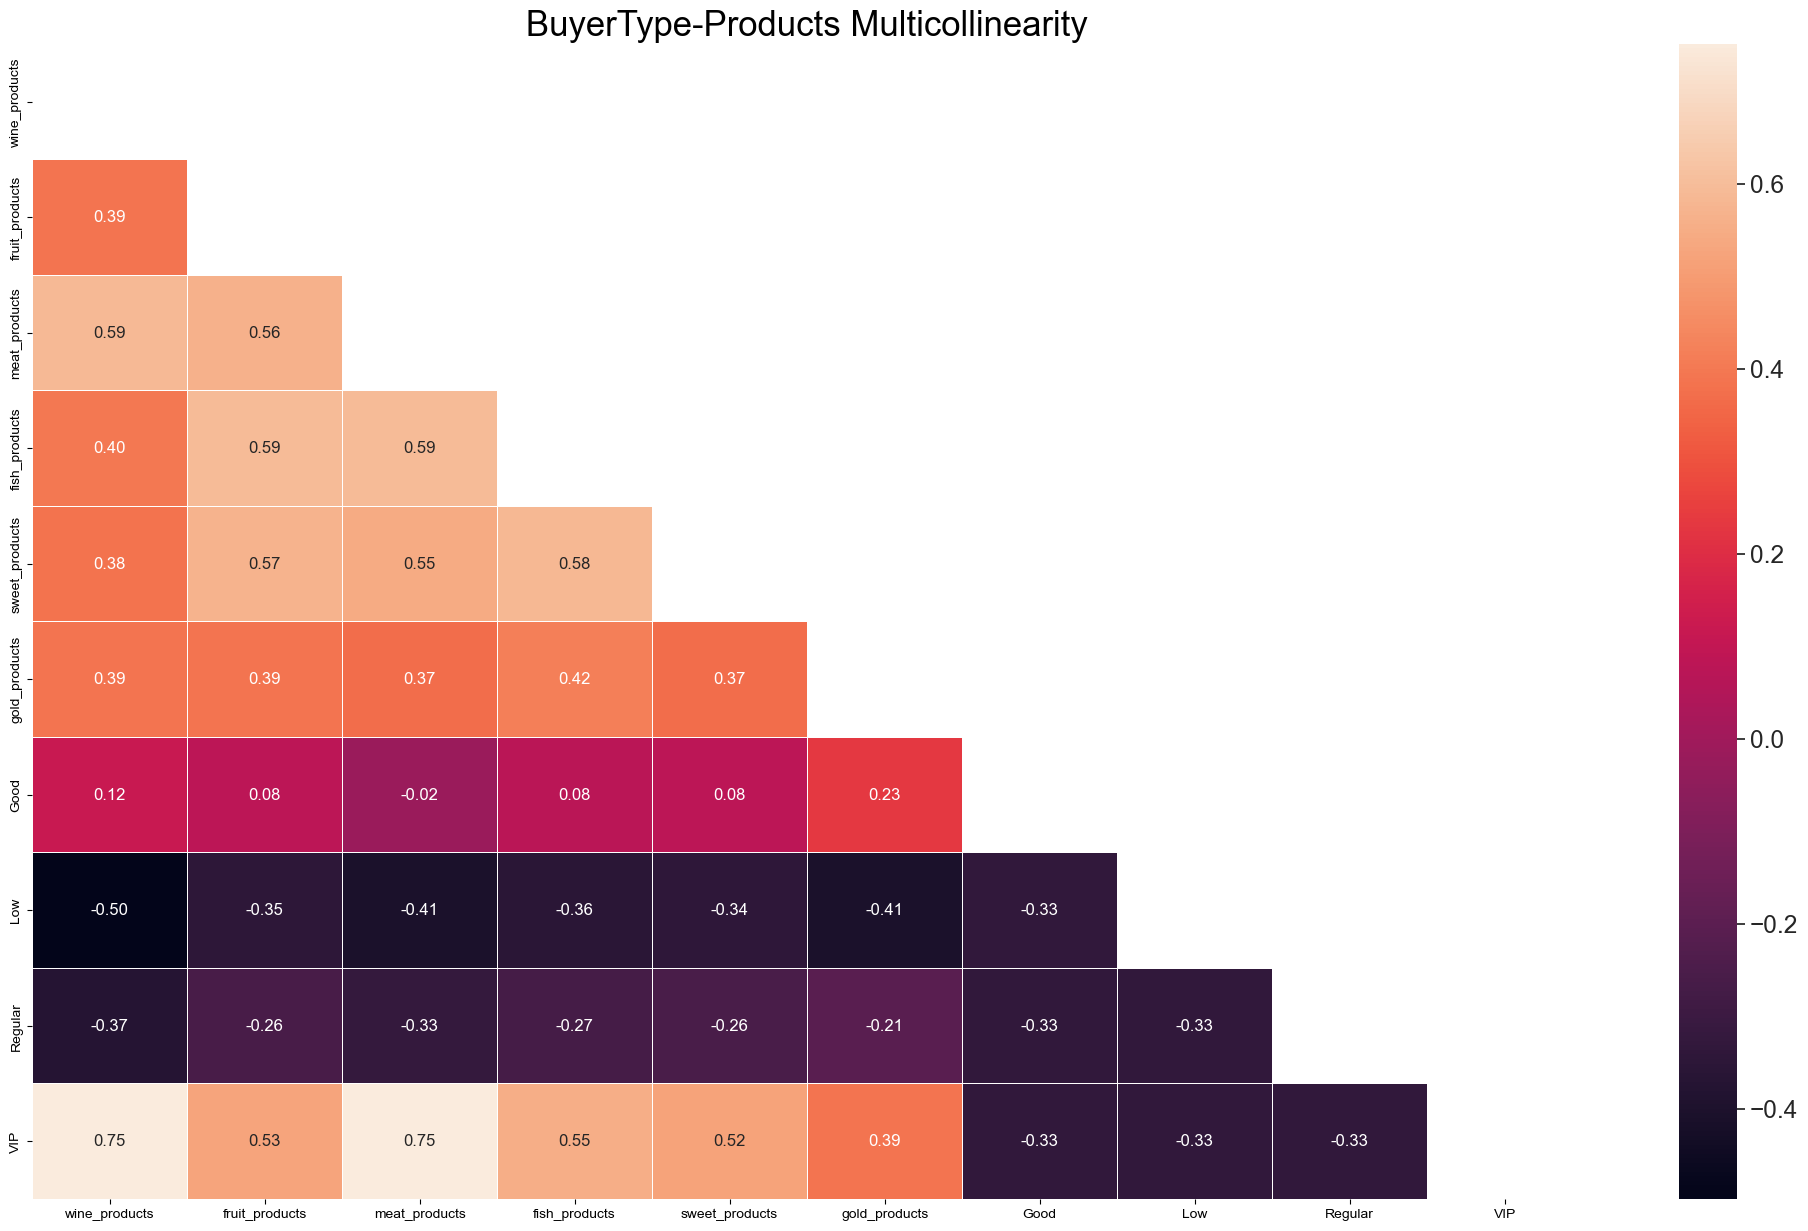

In [59]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(buyer_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.6) # increase font size

ax = sns.heatmap(buyer_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="rocket", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("BuyerType-Products Multicollinearity", fontsize=25) # add title
plt.show()

- Our **VIP** clients have a strong correlation with **Wine** and **Meat** Products. Also they have good correlation for other products as well
- For **Good** and **Regular** clients, there's no significant correlations. Good tends to be positive and Regular viceversa, but in both cases there's not enough force.
- **Low** clients have some considerable negative correlation with **Wine**, **Meat** and **Gold**. Evidence of the choice to purchase other products instead
- We observed a significant **positive correlation** (0.59) between **Meat** and **Wine**; **Meat** and **Fish** (0.59) & **Fish** and **Fruit** products (0.59). Good indicator for making **related offers**
- From here, we can suggest Marketing to focus its efforts on promoting **excellence/more expensive Wine** and **Meat** products to **VIP** clients, given their tendency to purchase these products

<h3 style="color: #6D183F;">Buyer Type Correlation with Purchase Type</h3>

In [60]:
# As we did it before, now we make a new df with purchases columns to correlate with "buyer_type" labels

print(df.columns.get_loc("deal_purchases"))
print(df.columns.get_loc("store_purchases"))

17
20


In [61]:
df_purchase = df.iloc[:,17:21]

In [62]:
# We use the buyer dummies obtained before to concant with the new purchases df 

df_purchase = pd.concat([df_purchase, buyer_dummies], axis=1)
df_purchase = df_purchase*1

In [63]:
df_purchase.head(1)

deal_purchases  web_purchases  catalog_purchases  store_purchases  Good  \
0               3              8                 10                4     0   

   Low  Regular  VIP  
0    0        0    1

In [64]:
# Let's proceed with correlation

purchases_corr = df_purchase.corr()

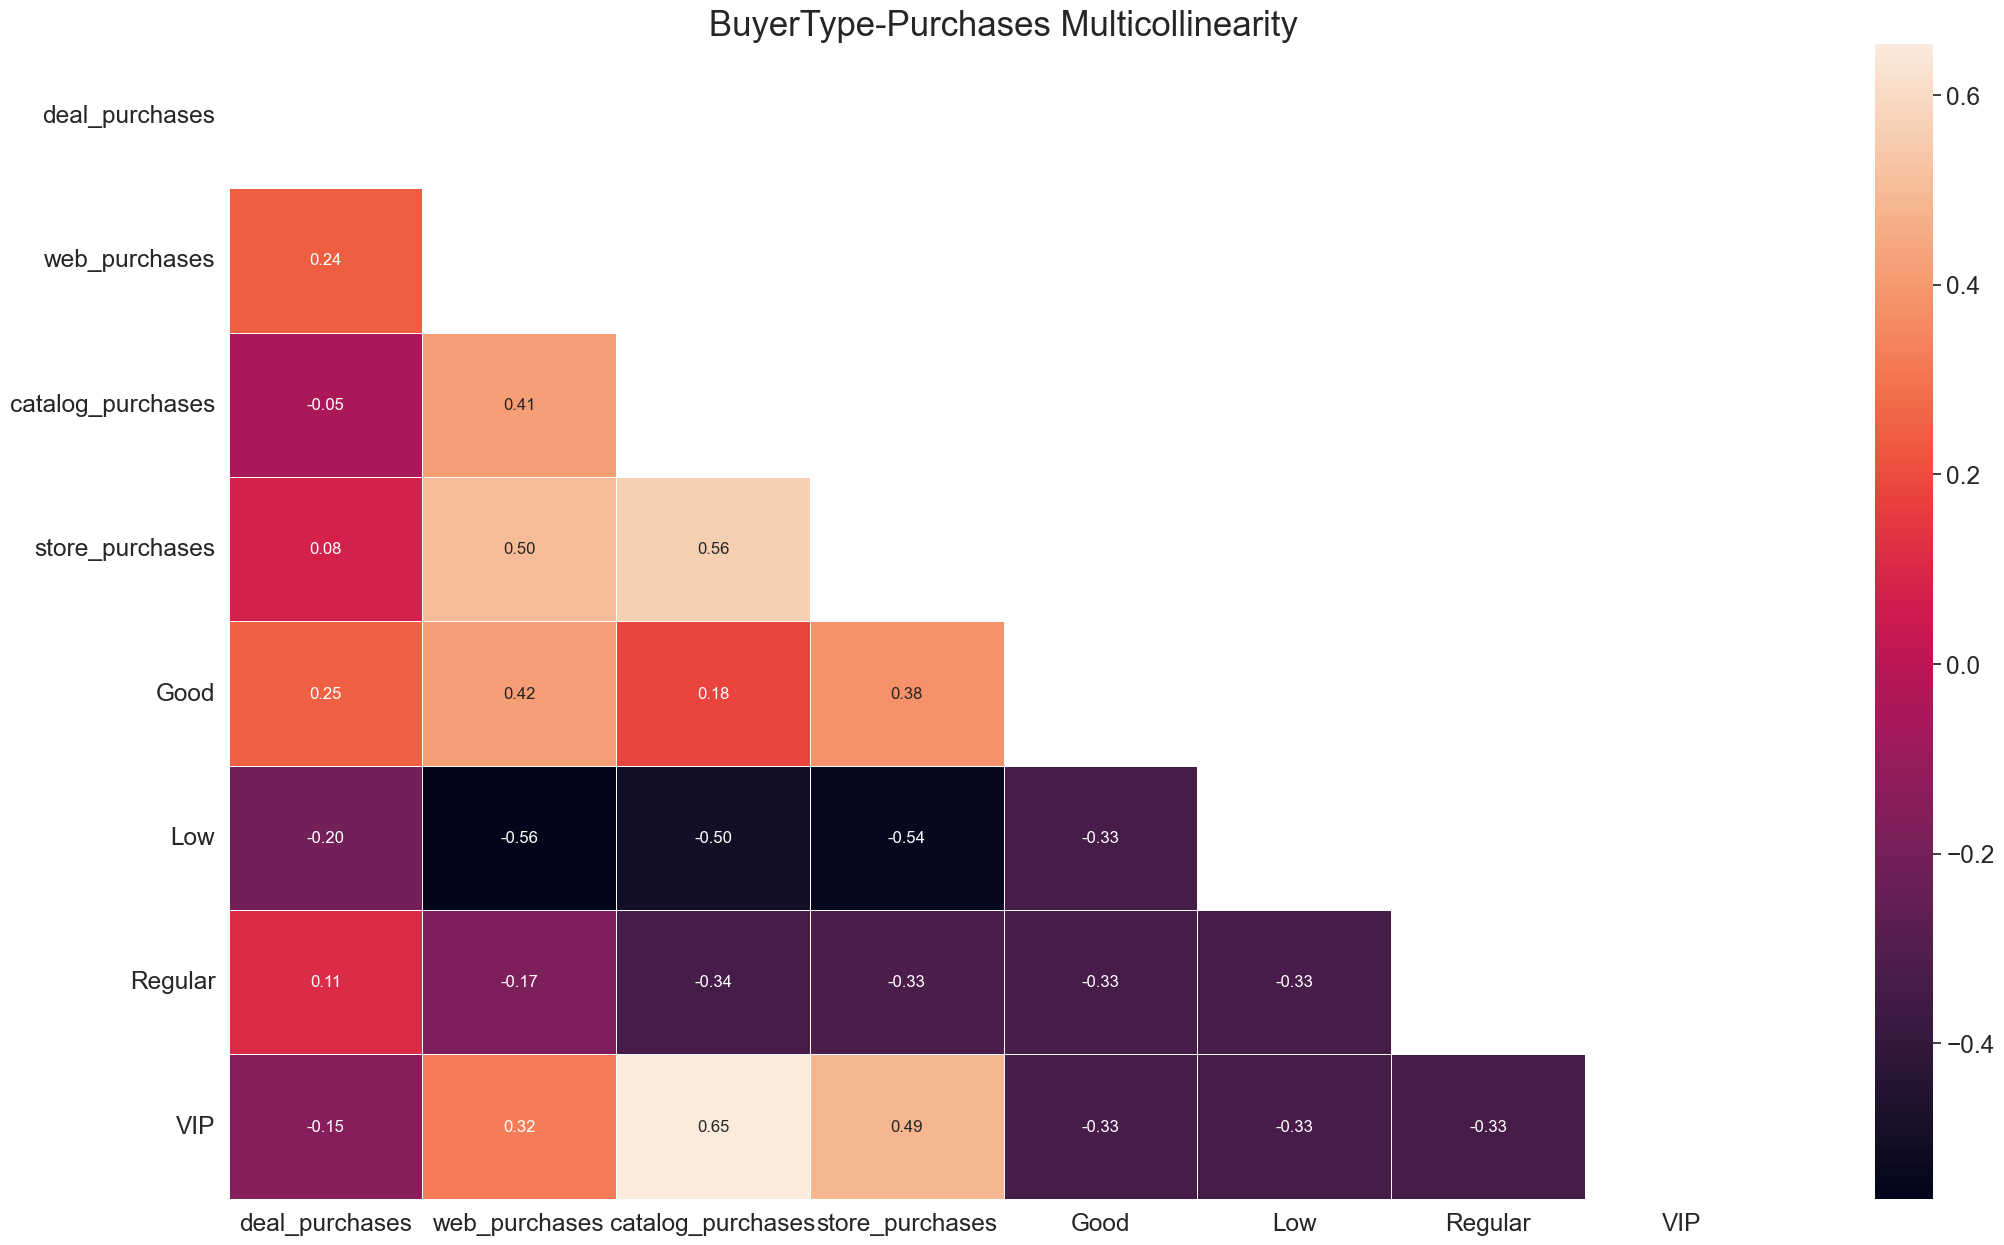

In [65]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(purchases_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.6) # increase font size

ax = sns.heatmap(purchases_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="rocket", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("BuyerType-Purchases Multicollinearity", fontsize=25) # add title
ax.set_facecolor('white') 
plt.grid(False) 
plt.show()
plt.show()

- For our **VIP** customers, the **most common** form of purchase is through **Catalog**, followed by **Store**
- For **Good** customers, there's a tendency to buy through **Web** and **Store**
- For **Regular** customers there's no significant correlation, so we can deduce that they have no predilection for their purchase mode
- For **Low** customers there's a negative tendency to buy trough **Web**, **Catalog** and **Store**.
- As a recommendation, we propose to **redirect retargeting actions** from **Low** customers to the other groups

<h2 style="color: #A4064D;">Exporting CSV for BUYER PERSONA</h2>

In [66]:
# We export this treated dataframe to a new csv for making BUYER PERSONA profiles

df.to_csv("for_buyer_persona.csv")